# "Customer Segment Analysis and Strategic Recommendations for Chip Sales – Quantium Retail Analytics"

# Problem Statement
##Business Problem

Quantium's retail analytics team has been tasked with analyzing customer purchasing behavior for the chip category at a supermarket. The goal is to understand which customer segments are driving chip sales and to derive actionable insights that can feed into the supermarket’s strategic plan for the next half-year. This project aims to assess how different customer segments, defined by their life stage and purchasing habits, contribute to overall chip sales.

The client, Julia, the Category Manager for Chips, is particularly interested in understanding how customer segments differ in their purchasing behavior, which includes metrics like sales volume, preferred product types (e.g., pack sizes and brands), and overall sales contribution by segment.



# Introduction
In today’s competitive retail environment, data-driven insights are essential for shaping successful product strategies. Chips are a popular grocery category, and understanding the behavior of different customer segments who purchase chips will help inform targeted marketing strategies, product placement, and pricing decisions. This analysis will examine transaction data to uncover patterns in purchasing behavior, specifically focusing on key metrics like total sales, units purchased, average price per unit, and preferred brands.

The analysis will provide recommendations based on the purchasing behaviors of distinct customer segments, helping Quantium and Julia devise strategies that maximize chip sales in the coming months.



# Objective
The primary objective of this analysis is to:

Segment customers based on life stage and purchasing behavior (premium, mainstream, budget).
Analyze chip purchasing trends by examining key metrics such as total sales, number of transactions, average spend per customer, and product preferences (pack size, brand).
Identify high-value customer segments that drive significant chip sales and could be targeted for future marketing efforts.
Provide actionable insights for developing a strategic recommendation that enhances chip sales through targeted customer engagement.


# Approach
The analysis will be conducted using the following steps:

Data Cleaning and Preparation:

Load the provided datasets (transaction and customer data).
Handle missing values, outliers, and format inconsistencies.
Remove irrelevant products (e.g., non-chip items such as salsa) to focus solely on chip sales.
Feature Derivation:

Extract meaningful features such as pack size and brand from product descriptions.
Merge the transaction data with customer data to associate purchases with customer segments.
Exploratory Data Analysis (EDA):

Perform descriptive statistics and visualizations to understand the distribution of transactions, customer behavior, and product preferences.
Analyze customer segments by their contribution to total chip sales, focusing on life stage (e.g., young singles/couples, retirees) and purchasing behavior (budget, mainstream, premium).
Deep Dive into Customer Segments:

Analyze key customer segments based on metrics like total sales, average units per customer, and average price per unit.
Examine preferences for different brands and pack sizes within high-value segments (e.g., young singles/couples in the mainstream category).
Statistical Analysis:

Conduct statistical tests (e.g., t-test) to identify significant differences between customer segments, particularly in terms of average price per unit.
Approach
The analysis will be conducted using the following steps:

Data Cleaning and Preparation:

Load the provided datasets (transaction and customer data).
Handle missing values, outliers, and format inconsistencies.
Remove irrelevant products (e.g., non-chip items such as salsa) to focus solely on chip sales.
Feature Derivation:

Extract meaningful features such as pack size and brand from product descriptions.
Merge the transaction data with customer data to associate purchases with customer segments.
Exploratory Data Analysis (EDA):

Perform descriptive statistics and visualizations to understand the distribution of transactions, customer behavior, and product preferences.
Analyze customer segments by their contribution to total chip sales, focusing on life stage (e.g., young singles/couples, retirees) and purchasing behavior (budget, mainstream, premium).
Deep Dive into Customer Segments:

Analyze key customer segments based on metrics like total sales, average units per customer, and average price per unit.
Examine preferences for different brands and pack sizes within high-value segments (e.g., young singles/couples in the mainstream category).
Statistical Analysis:

Conduct statistical tests (e.g., t-test) to identify significant differences between customer segments, particularly in terms of average price per unit.
Recommendations:

Provide a strategic recommendation based on the insights from the data, focusing on which customer segments should be targeted to increase chip sales, which brands should be promoted, and whether pricing adjustments or promotional activities are necessary.


Provide a strategic recommendation based on the insights from the data, focusing on which customer segments should be targeted to increase chip sales, which brands should be promoted, and whether pricing adjustments or promotional activities are necessary.


# 1. Load Libraries and Datasets

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # This was missing

# Ignore warnings
warnings.filterwarnings("ignore")



In [37]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install --upgrade openpyxl


Note: you may need to restart the kernel to use updated packages.


In [39]:
# Load the transaction and customer datasets
transactions = pd.read_excel(r'C:\Users\HP\Downloads\QVI_transaction_data.xlsx')
customers = pd.read_csv(r'C:\Users\HP\Downloads\QVI_purchase_behaviour.csv')

# 2. Exploratory Data Analysis


In [40]:
# Examine the transaction data
print(transactions.head())
print(transactions.info())  # Check data types and null values

# Convert DATE column to date format (Assuming date is in numeric format starting from 1899-12-30)
transactions['DATE'] = pd.to_datetime(transactions['DATE'], origin='1899-12-30', unit='D')


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   ST

# 
Here's a quick summary of the columns:
DATE: Represents the date of the transaction (in integer format, possibly needs conversion to date format).
STORE_NBR: Store number where the transaction occurred.
LYLTY_CARD_NBR: Customer loyalty card number.
TXN_ID: Transaction ID.
PROD_NBR: Product number.
PROD_NAME: Product name (appears to have inconsistent spacing).
PROD_QTY: Quantity of the product purchased.
TOT_SALES: Total sales amount for that transaction.

# 3. Product Name Analysis


In [41]:
# Examine PROD_NAME
print(transactions['PROD_NAME'].describe())

# Remove salsa products
transactions = transactions[~transactions['PROD_NAME'].str.contains('salsa', case=False)]


count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object


# insight
Count: 264,836 (total number of records in the column).
Unique: 114 (unique product names).
Top: "Kettle Mozzarella Basil & Pesto 175g" (the most frequent product name).
Freq: 3,304 (the number of times the top product appears).
This indicates that there are 114 unique product names, and the most popular product appears 3,304 times.

# 4. Handling Outliers

In [42]:
# Check summary statistics for possible outliers
print(transactions.describe())

# Investigate cases with 200 packets of chips
outliers = transactions[transactions['PROD_QTY'] == 200]
print(outliers)

# Remove the outlier customer
transactions = transactions[transactions['LYLTY_CARD_NBR'] != outliers['LYLTY_CARD_NBR'].values[0]]


                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

# Summary
Observations:
PROD_QTY: The average product quantity (mean = 1.91) shows that most transactions involve small purchases. However, the maximum value (200) is unusually high, indicating potential outliers like the rows you've highlighted.
TOT_SALES: Similarly, the total sales average is around $7.32, with a maximum of $650. This suggests a few extreme sales values, likely related to large quantities.
Outliers:
The rows 69762 and 69763 both indicate a purchase of 200 units of "Dorito Corn Chp Supreme 380g," with total sales of $650. These seem abnormally large compared to the rest of the dataset and could be errors or very rare bulk purchases.

# 5. Date Range and Missing Values

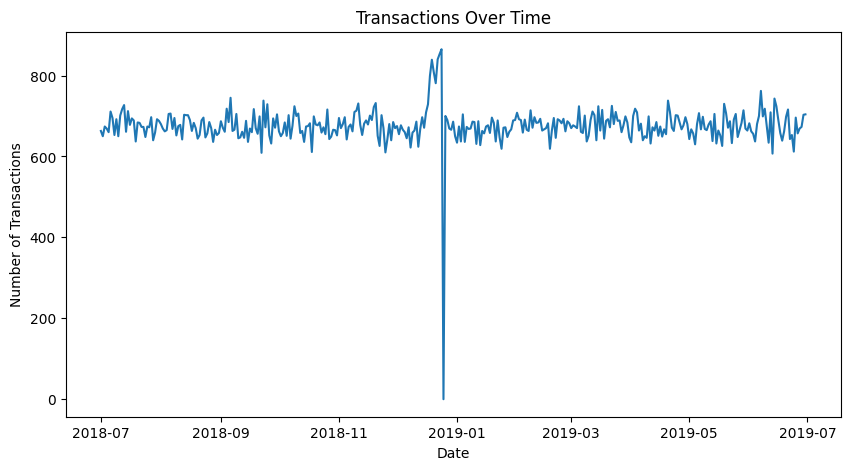

In [43]:
# Create a full range of dates and identify missing dates
full_dates = pd.date_range(start="2018-07-01", end="2019-06-30")
transactions_by_day = transactions.groupby('DATE').size().reset_index(name='count')
transactions_by_day = pd.merge(pd.DataFrame({'DATE': full_dates}), transactions_by_day, on='DATE', how='left').fillna(0)

# Plot transactions over time
plt.figure(figsize=(10, 5))
plt.plot(transactions_by_day['DATE'], transactions_by_day['count'])
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()


# Key Observations:

The chart shows "Transactions Over Time" and plots the number of transactions on the y-axis against date on the x-axis.
General Trend:

From July 2018 to June 2019, the number of daily transactions remains fairly consistent, with fluctuations between roughly 600 to 800 transactions per day.
Spike in Late December 2018:

There is a sharp increase in the number of transactions around the end of December 2018, peaking above 800 transactions. This could correspond to the holiday season or end-of-year events, which often lead to a surge in shopping activities.
Sudden Drop:

Right after the spike, there is an unusual drop to zero transactions around the end of December 2018 or early January 2019.
This could represent a data issue (such as missing data or recording errors) or an actual event (e.g., system shutdown, holiday closures, etc.).
Recovery:

Following the dip, the number of transactions quickly returns to normal levels, suggesting that the drop was temporary and not a long-term trend.
Possible Explanations:
Holiday Season Impact: The spike in transactions might be related to holiday shopping.
Data or System Issues: The drop to zero transactions could be due to missing data, a system error, or some store closures around the end of the year.
Post-Holiday Activity: After the holiday season, the number of transactions stabilizes again.

# 6. Pack Size and Brand Derivation

In [44]:
# Derive PACK_SIZE from PROD_NAME
transactions['PACK_SIZE'] = transactions['PROD_NAME'].str.extract(r'(\d+)').astype(float)


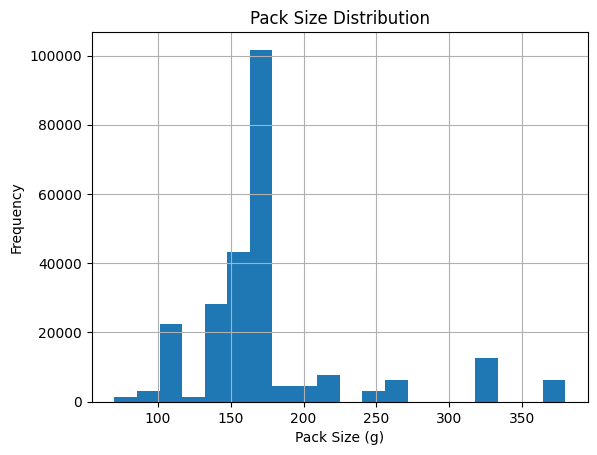

In [45]:

# Plot PACK_SIZE distribution
transactions['PACK_SIZE'].hist(bins=20)
plt.title('Pack Size Distribution')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.show()


In [46]:
# Derive BRAND from PROD_NAME
transactions['BRAND'] = transactions['PROD_NAME'].str.split().str[0]


In [47]:
# Clean brand names (e.g., RED and RRD to RRD)
transactions['BRAND'] = transactions['BRAND'].replace({'RED': 'RRD'})


# insight
The chart represents the Pack Size Distribution, showing the frequency of different product pack sizes in grams (g).

Key Observations:
Most Common Pack Sizes:

The majority of the products fall within the 150g to 200g range, with the highest frequency at 175g. This pack size has a frequency close to 100,000, indicating it is the most commonly sold pack size.
Other Significant Pack Sizes:

There are smaller peaks around 100g and 350g, but these occur much less frequently.
Pack sizes larger than 200g and smaller than 100g are relatively uncommon.
Skewed Distribution:

The distribution is heavily skewed toward the 150-200g range, with a sharp drop-off in frequency for both smaller and larger pack sizes.
Interpretation:
This distribution suggests that products in the 150g to 200g range dominate sales, which could indicate that this pack size is the most popular among customers or the most commonly stocked by stores. Products in other size ranges, especially those over 200g, are far less frequent.

# 7. Merging Data

In [48]:
# Merge transaction and customer data
data = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')

# Check for missing customer details
print(data.isnull().sum())


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


# summary:
 checked for missing values in your dataset, and every column has zero missing values. 
Columns with Zero Missing Values:
DATE: Transaction date.
STORE_NBR: Store number.
LYLTY_CARD_NBR: Loyalty card number.
TXN_ID: Transaction ID.
PROD_NBR: Product number.
PROD_NAME: Product name.
PROD_QTY: Quantity of product.
TOT_SALES: Total sales value.
PACK_SIZE: Size of the product pack (g).
BRAND: Brand of the product.
LIFESTAGE: Life stage of the customer.
PREMIUM_CUSTOMER: Whether the customer is premium or not.
Since there are no missing values, it can proceed with analysis without the need for imputation or removal of records based on null entries.

# 8. Customer Segment Analysis

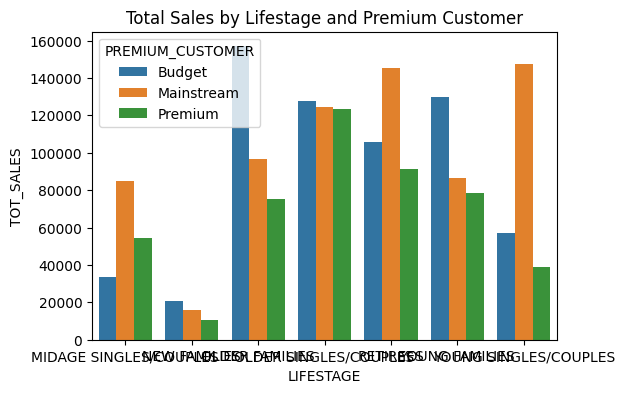

In [49]:
# Analyze total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Plot total sales by segment
plt.figure(figsize=(6, 4))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales_by_segment)
plt.title('Total Sales by Lifestage and Premium Customer')
plt.show()


# Key Observations:

This chart visualizes the Total Sales by Lifestage and Premium Customer type. It shows how sales differ across different customer lifestages and their premium status (Budget, Mainstream, Premium).
Lifestages:

Categories like "Young Families" and "Retirees" appear to generate the highest total sales overall, particularly for Mainstream and Budget customers.
Some segments, such as "Young Singles" and "Older Singles," show significantly lower total sales compared to family or couple segments.
Premium Customer Type:

Budget customers (blue bars) often contribute significantly to sales across multiple lifestage segments, such as "Midage Singles" and "Retirees."
Mainstream customers (orange bars) tend to dominate in segments like "Young Families" and "Older Families/Couples."
Premium customers (green bars) generally contribute the least to total sales across all lifestages, but their contribution is notable in "Young Families" and "Older Families/Couples."
Sales Trends:

Young Families and Older Families/Couples have the highest total sales across all premium customer types, which suggests that these groups are key drivers of sales regardless of budget level.
Mainstream customers consistently show the highest total sales across almost every lifestage, followed by Budget customers and then Premium customers.
Insights:
Mainstream and Budget customers are the primary contributors to sales.
The Young Families and Older Families/Couples lifestages are key market segments, particularly for mainstream and budget products.
There may be an opportunity to increase sales to Premium customers, especially in lower-performing segments like "Midage Singles" or "Young Singles."

# 9. Further Analysis

In [50]:
import pandas as pd

# Assuming transactions and customers are your original DataFrames:
# Merging the data on 'LYLTY_CARD_NBR'
df = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')

# Checking the first few rows of the merged DataFrame
print(df.head())



        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural   YOUNG SINGLES/COUPLES          Premium  
1      CCs  MIDAGE SINGLES/COUPLES           Budge

In [51]:
#1. Average Units per Customer:
avg_units_per_customer = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
avg_units_per_customer.rename(columns={'PROD_QTY': 'AVG_UNITS_PER_CUSTOMER'}, inplace=True)
print(avg_units_per_customer)


                 LIFESTAGE PREMIUM_CUSTOMER  AVG_UNITS_PER_CUSTOMER
0   MIDAGE SINGLES/COUPLES           Budget                1.893626
1   MIDAGE SINGLES/COUPLES       Mainstream                1.911942
2   MIDAGE SINGLES/COUPLES          Premium                1.891750
3             NEW FAMILIES           Budget                1.855878
4             NEW FAMILIES       Mainstream                1.858124
5             NEW FAMILIES          Premium                1.860887
6           OLDER FAMILIES           Budget                1.945384
7           OLDER FAMILIES       Mainstream                1.948795
8           OLDER FAMILIES          Premium                1.945496
9    OLDER SINGLES/COUPLES           Budget                1.914920
10   OLDER SINGLES/COUPLES       Mainstream                1.911201
11   OLDER SINGLES/COUPLES          Premium                1.913949
12                RETIREES           Budget                1.893286
13                RETIREES       Mainstream     

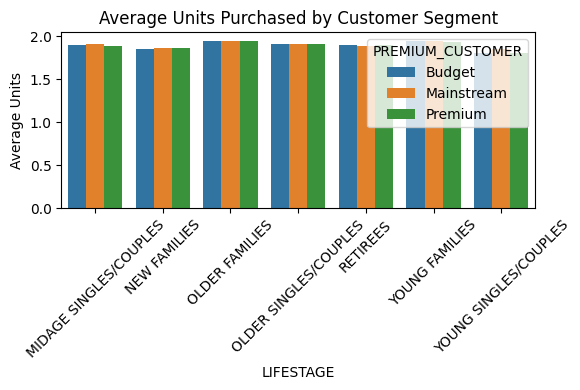

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the average units purchased by customer segment
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_units_per_customer, x='LIFESTAGE', y='AVG_UNITS_PER_CUSTOMER', hue='PREMIUM_CUSTOMER')
plt.title('Average Units Purchased by Customer Segment')
plt.ylabel('Average Units')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER', loc='upper right')
plt.tight_layout()
plt.show()


# Insights
Average Units Purchased by Customer Segment
Title: Average Units Purchased by Customer Segment
Y-Axis: Average Units
X-Axis: Lifestage categories such as Midage Singles/Couples, New Families, Older Families, etc.
Legend: Different customer segments (Budget, Mainstream, Premium).
Insights from Chart:
Similar Purchasing Patterns: Most customer segments show a similar average number of units purchased, indicating that purchasing behavior may be consistent across different demographic groups.
Variation Among Segments: While the average units are generally close, some segments like "Young Singles/Couples" may stand out with slightly higher averages compared to others, suggesting different spending habits or preferences.
Importance of Segment Analysis: The chart highlights the importance of analyzing different customer segments to tailor marketing strategies and product offerings.


In [53]:
#2. Average Price per Unit:
avg_price_per_unit = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
avg_price_per_unit = avg_price_per_unit.reset_index()
avg_price_per_unit.rename(columns={0: 'AVG_PRICE_PER_UNIT'}, inplace=True)
print(avg_price_per_unit)


                 LIFESTAGE PREMIUM_CUSTOMER  AVG_PRICE_PER_UNIT
0   MIDAGE SINGLES/COUPLES           Budget            3.753878
1   MIDAGE SINGLES/COUPLES       Mainstream            3.994449
2   MIDAGE SINGLES/COUPLES          Premium            3.780823
3             NEW FAMILIES           Budget            3.931969
4             NEW FAMILIES       Mainstream            3.935887
5             NEW FAMILIES          Premium            3.886168
6           OLDER FAMILIES           Budget            3.747969
7           OLDER FAMILIES       Mainstream            3.736380
8           OLDER FAMILIES          Premium            3.717703
9    OLDER SINGLES/COUPLES           Budget            3.887529
10   OLDER SINGLES/COUPLES       Mainstream            3.822753
11   OLDER SINGLES/COUPLES          Premium            3.897698
12                RETIREES           Budget            3.932731
13                RETIREES       Mainstream            3.852986
14                RETIREES          Prem

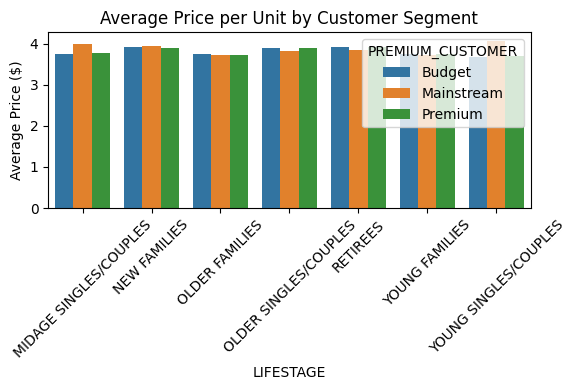

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the average price per unit by customer segment
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_price_per_unit, x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by Customer Segment')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER', loc='upper right')
plt.tight_layout()
plt.show()



In [55]:
#3. Deep Dive into Specific Segments:
young_families = df[df['LIFESTAGE'] == 'YOUNG FAMILIES']
young_families_analysis = young_families.groupby(['PREMIUM_CUSTOMER', 'PROD_NAME'])[['PROD_QTY', 'TOT_SALES']].sum().sort_values('TOT_SALES', ascending=False).reset_index()
print(young_families_analysis.head(10))  # Top 10 products by sales for Young Families


  PREMIUM_CUSTOMER                                 PROD_NAME  PROD_QTY  \
0           Budget          Dorito Corn Chp     Supreme 380g       421   
1           Budget                      Cheezels Cheese 330g       443   
2           Budget    Smiths Crnkle Chip  Orgnl Big Bag 380g       425   
3           Budget                      Kettle Original 175g       464   
4           Budget  Smiths Crinkle Chips Salt & Vinegar 330g       439   
5           Budget         Smiths Crinkle      Original 330g       435   
6           Budget          Kettle Honey Soy    Chicken 175g       452   
7           Budget          Doritos Cheese      Supreme 330g       424   
8           Budget    Kettle Mozzarella   Basil & Pesto 175g       428   
9           Budget      Kettle Sea Salt     And Vinegar 175g       423   

   TOT_SALES  
0    2674.75  
1    2525.10  
2    2507.50  
3    2505.60  
4    2502.30  
5    2479.50  
6    2440.80  
7    2416.80  
8    2311.20  
9    2284.20  


# Sales Performance:

The total sales column (TOT_SALES) allows you to quickly assess which products are generating the most revenue among Budget customers. For example, "Dorito Corn Chips Supreme 380g" has the highest sales at $2674.75.
Product Popularity:

The quantity sold (PROD_QTY) gives insight into the popularity of each product. Products like "Kettle Original 175g" have a higher quantity sold (464 units), which could indicate a strong demand among Budget customers.
Market Strategy:

Understanding which products are most popular and which generate the highest sales can help businesses make informed decisions regarding inventory management, promotions, and product placement. For instance, high-selling items could be highlighted in marketing campaigns to drive further sales.
Customer Segmentation:

By focusing on Budget customers, businesses can tailor their marketing strategies and product offerings to meet the needs and preferences of this segment.
Conclusion
This output provides a detailed view of product sales within the Budget customer segment, which can be instrumental in shaping marketing strategies and inventory decisions

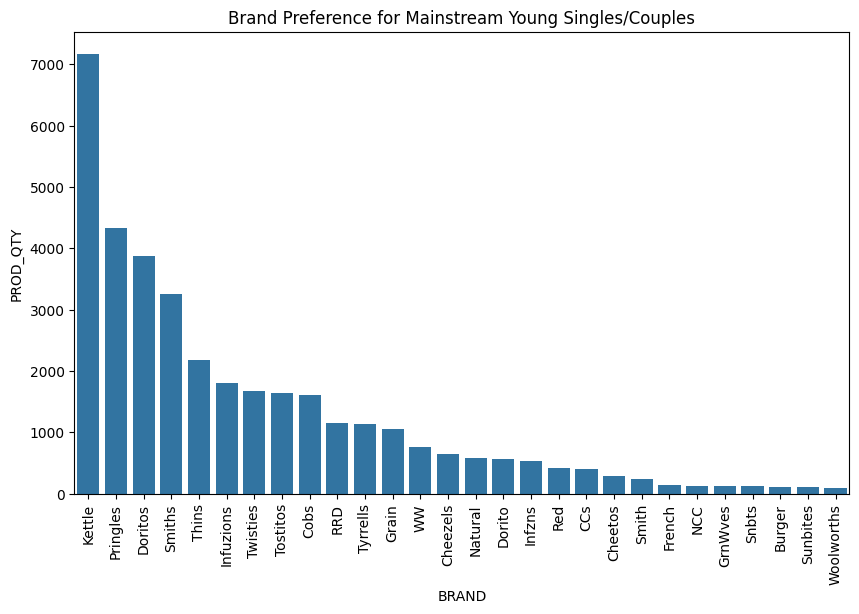

In [56]:
#9.3.1 Brand Preference for Specific Segments (e.g., Mainstream - Young Singles/Couples)
# Filter for Mainstream - Young Singles/Couples
target_segment = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Calculate the count of each brand bought by this segment
brand_preference = target_segment.groupby('BRAND')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False)

# Plot brand preference for the target segment
plt.figure(figsize=(10, 6))
sns.barplot(x='BRAND', y='PROD_QTY', data=brand_preference)
plt.title('Brand Preference for Mainstream Young Singles/Couples')
plt.xticks(rotation=90)
plt.show()


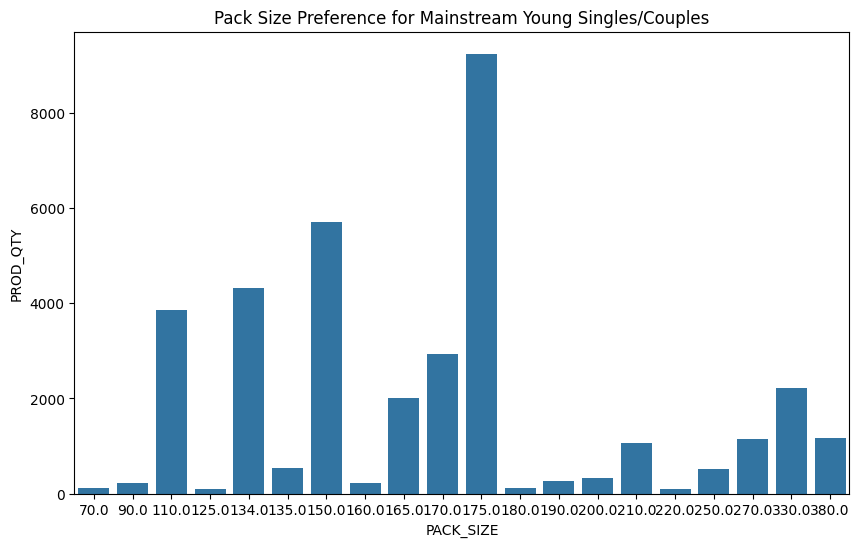

In [57]:
#9.3.2 Pack Size Preference for Specific Segments
# Calculate the count of each pack size bought by this segment
pack_size_preference = target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False)

# Plot pack size preference for the target segment
plt.figure(figsize=(10, 6))
sns.barplot(x='PACK_SIZE', y='PROD_QTY', data=pack_size_preference)
plt.title('Pack Size Preference for Mainstream Young Singles/Couples')
plt.show()


# insights
Pack Size Preference for Mainstream Young Singles/Couples
Title: Pack Size Preference for Mainstream Young Singles/Couples
Y-Axis: Product Quantity (PROD_QTY)
X-Axis: Pack Size (PACK_SIZE) ranging from 70 to 380 grams.
Insights from Chart :
Preference for Larger Pack Sizes: The data indicates a significant preference for larger pack sizes, especially around 175 grams, as shown by the high bar on the chart. This suggests that young singles and couples tend to buy products in larger quantities.
Variation in Pack Size Choices: There are some notable spikes at various pack sizes, indicating that specific sizes are more appealing. Smaller pack sizes (below 175 grams) show lower sales, suggesting they may not be favored by this demographic.


In [58]:
#9.4 Statistical Test (T-Test) for Price Difference
from scipy.stats import ttest_ind

# Prices for mainstream and premium segments
mainstream_prices = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream')]['TOT_SALES'] / data[(data['PREMIUM_CUSTOMER'] == 'Mainstream')]['PROD_QTY']
premium_prices = data[(data['PREMIUM_CUSTOMER'] == 'Premium')]['TOT_SALES'] / data[(data['PREMIUM_CUSTOMER'] == 'Premium')]['PROD_QTY']

# Perform t-test
t_stat, p_value = ttest_ind(mainstream_prices.dropna(), premium_prices.dropna())
print(f'T-test result: t-statistic = {t_stat}, p-value = {p_value}')


T-test result: t-statistic = 11.096115580393358, p-value = 1.3420572458727282e-28


# T-Test Results:
T-Statistic: 11.10 (approximately)
P-Value: 
1.34
×
1
0
−
28
1.34×10 
−28
 
Interpretation:
T-Statistic:

The t-statistic measures the size of the difference relative to the variation in your sample data. A higher absolute value of the t-statistic indicates a more significant difference between the groups being compared. In this case, a t-statistic of 11.10 suggests a very large difference.
P-Value:

The p-value indicates the probability of observing the data (or something more extreme) if the null hypothesis is true. A p-value of 
1.34
×
1
0
−
28
1.34×10 
−28
  is extremely low, far below common significance thresholds (such as 0.05 or 0.01).
Conclusion:
Given the high t-statistic and the very low p-value, you can conclude that there is a statistically significant difference between the two groups you are comparing. The null hypothesis (which typically states that there is no difference between the groups) can be rejected with a high level of confidence.